# Úkol č. 1 - vizualizace dat a web scraping (do 26. října)


  * V rámci tohoto úkolu musíte opanovat nástroje pro stahování dat z webu (tzv. _web scraping_) a následně data zpracovat a vizualizovat. 
  * Jak jsme ukázali na prvním cvičení (poslední část), data o závěrečných pracích na některých univerzitách skýtají zajímavé informace. 
  * Vaším úkolem je vybrat si jednu z univerzit ze seznamu níže, uložit data o závěrečných pracích v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace.
  
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Výběr zdroje dat

Níže jsou odkazy na katalogy knihoven vybraných vysokých škol. Je třeba pochopit, jak z něho dostat informace o závěrečných pracích (bakalářky a diplomky) a ty pak nějak _vyparsovat_.

  * [Vysoká škola finanční a správní, a.s.](https://is.vsfs.cz/thesis/)
  * [Metropolitan university Prague](https://s-knihovna.mup.cz/katalog/eng/baze.htm)
  * [Vysoká škola regionálního rozvoje a Bankovní institut – AMBIS ](https://is.ambis.cz/thesis/)

Případně si můžete vybrat školu dle uvážení na portálu [theses.cz](https://theses.cz/th_search/tematicke), ale musí být splněno následující:
  * závěrečné práce musí být z jedné školy, 
  * alespoň z období 5 let, 
  * musí jich být alespoň 2000,
  * u každé práce lesapoň následující: informaci o typu (bakalářka/diplomka), název, jméno vedoucího (vč. titulů), rok obhajoby, hodí se i jméno oponenta.

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Stáhněte data z vybraného zdroje a uložte je do tabulky ve formátu _csv_.
  * Data musí obsahovat u každé práce (= 1 řádek tabulky) _alespoň_ toto: 
    * Typ prace (BP, MP)
    * Nazev prace
    * Jmeno vedouciho
    * Jmeno oponena
    * Dataum
    * Vysledek
    * Nazev skoly 
    * Nazev fakulty
    * Jazyk 
    
  * V druhé části Vašeho Jupyter notebooku pracujte s touto tabulkou načtenou z _csv_ souboru (aby opravující nemusel spouštět stahování z webu).
  * Tabulku ve formátu _csv_ také odevzdejte.
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Časový vývoj (po rocích) počtu obhájených prací (vč. rozlišení jejich typu).
    * Nejpilnější vedoucí (počet vedených prací na rok, za celou dobu atp.). 
    * To samé pro oponenty a pro součet vedených a oponovaných prací.
    * Průměrný počet (medián, minimum, maximum, rozptyl) prací na vedoucího (resp. oponenta) a rok a další informace o rozložení vedení prací na školitele.
    * Rozložení vedoucích prací (a oponentů) podle titulů (bakalářský titul, magisterský titul, doktorský titul, docent, profesor, atp.).

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +2 body) Zobrazte tabulku (a případně i jiné věci) v Jupyter notebooku pomocí http://beakerx.com.
  * (až +2 body) Vymyslete další zajímavé pohledy na data.
  * (až +4 body) Vytvořte na základě Vašich dat interaktivní webovou stránku s popisem a vizualizací dat (bude asi nutné použít i nějaké javascriptové balíčky atp.).
  * (až +4 body) Stáhněte data k více školám a porovnejte výsledky. Zkuste najít společné školitele/oponenty.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor(y) se staženými daty.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [3]:
### odtud už je to Vaše

### Imort all needed stuff for downloading
import requests
from bs4 import BeautifulSoup
import string
import re
from pprint import pprint
import csv
import time

# A. DOWNLOADING

### 1. Obtain URLs to all thesis form *MPU*
* That is done in two steps
1. We'll obtain **URL of names of all authors** (I've dicovered that **MPU** have some sort of broken search - on one hand it don't allow you to list let the search filed empty, but on the other hadn, it allows you to browse all authors by first letter in thier name)
2. We explore those URL and get URL to all actuall thesis

In [ ]:
### Scrap all URL of of thesis and save them to file

### First scrap URL of authors
base_url = 'https://s-knihovna.mup.cz/katalog/eng/c56a'
author_urls = []
for i in list (string.ascii_lowercase)[:26]:
    if i == 'x':
        continue
    url = base_url  + i + ".htm"
    # Cool now we'll extract all those names with URL's
    r = requests.get(url)
    r.encoding='cp1250'
    soup = BeautifulSoup(r.text)
    table = soup.find('table', attrs={'class':'slovnik'})
    links = table.find_all('a')
    for link in links:
        author_urls.append(link['href'])

# second scrap URL of all thesis and save them in file
# note: this file is mix of log and actuall thesis links
author_cnt = len(author_urls)
thesis_urls = []
with open("thesis_links.txt", "a") as myfile:
    for i, author_url in enumerate(author_urls):
        if i < 832: # line 3832
            continue
        myfile.write( '[author_urls] {0}/{1}\n'.format(i, author_cnt))
        url = 'https://s-knihovna.mup.cz/katalog/eng/' + author_url
        r = requests.get(url)
        r.encoding='cp1250'
        soup = BeautifulSoup(r.text)
        table = soup.find('table', attrs={'class':'vysledky'})
        links = table.find_all('a', href = re.compile(r'l.dll\?cll~P='))
        for link in links:
            thesis_urls.append(link['href'])
            myfile.write(link['href'] + '\n')

### 2. Obtain data from these thesis's URLs

#### Prepare Thesis class for storing and parsing text data

In [ ]:
### This is just Thesis class which helps with parsing and storing data
class Thesis(object):

    def __init__(self):
        self.title_cz = ""
        self.title_en = ""
        self.author = ""
        self.curator = ""
        self.opponent = ""
        self.pages = ""
        self.language = ""
        self.year = ""
        self.type = ""
        self.school = "Metropolitní univerzita Praha"
        self.department = ""
        
    def to_string(self):
        data = '"' + self.title_cz + '","' + self.title_en + '","' + self.author + '","' +  self.curator  + '","' + self.opponent + '","' + self.pages + '","' + self.language + '","' +  self.year  + '","' + self.type + '","' + self.school + '","' + self.department + '"'
        return data
        
    def split_surname_name(self, data):
        data_split = data.split(",")
        if len(data_split) > 1:
            data_final = data_split[0].strip() + " " + data_split[1].strip()
        else:
            data_final = data_split[0].strip()
        return data_final
    
    def set_title(self, data):
        data_splitted = data.split ("=")
        self.title_cz = data_splitted[0].strip()
        self.title_cz = self.title_cz.replace('"', '') # maybe I sould put there "'" instead of nothing
        if len(data_splitted) > 1:
            self.title_en = data_splitted[1].strip()
            self.title_en = self.title_en.replace('"', '')
        return

    def set_author(self, data):
        self.author = self.split_surname_name(data)
        return
    
    def set_staff(self, data):
        splitted = data.split("\n")
        self.curator = self.split_surname_name(splitted[0])
        if len(splitted) >1 : 
            self.opponent = self.split_surname_name(splitted[1])
        return        
    
    def set_pages(self, data):
        splitted = data.split(" ")
        if len(splitted) >1 :
            self.pages = splitted[1]
    
    def set_language(self, data):
        self.language = data.strip()
        return
    
    def set_year(self, data):
        splitted = data.split(",")
        self.year = splitted[len(splitted) - 1].strip()
        return
    
    def set_type(self, data):
        if "Bc." in data:
            self.type = "BP"
        elif  "Mgr." in data:
            self.type = "DP"
        
    def set_department(self, data):
        if "Katedra" in data:
            splitted = data.split(",")
            if len(splitted) > 1:
                self.department = splitted[len(splitted) -2].strip()

#### Prepare functions for downloading and parsing html

In [ ]:
### Get data from specified thesis URL and return it
### It deals "brutally" with get_request limit 
def thesis_rows_data(thesis_url):
    url = 'http://s-knihovna.mup.cz/katalog/eng/' + thesis_url
    while True:
        try:
            r = requests.get(url)
            time.sleep(0.5)  # let the server breathe :-)
            break
        except Exception as e:
            with open("request_error_log.txt", "a") as log:
                log.write("[ERROR] " + url + "[sleeping 3min]")
            time.sleep(180) # sleep 3min...
            
    r.encoding='utf8'
    soup = BeautifulSoup(r.text)
    table = soup.find('table', attrs={'class':'listek'})
    tableX = table.find('table')
    rows = tableX.find_all('tr')
    return rows

### Parse data obtained from thesis URL, parse it and save it to Thesis object
def parse_rows(rows):
    new_thesis = Thesis()
    for row in rows:
        td = row.find_all('td')
        if td[0].text.strip() ==  'Title :':
            new_thesis.set_title(td[1].text)

        elif td[0].text.strip() == 'Main author :':
            new_thesis.set_author(td[1].text)

        elif td[0].text.strip() == 'Additional responsibility :':
            new_thesis.set_staff(td[1].text)

        elif td[0].text.strip() == 'Nakl.údaje :':
            new_thesis.set_year(td[1].text)

        elif td[0].text.strip() == 'Number of pages :':
            new_thesis.set_pages(td[1].text)

        elif td[0].text.strip() == 'Jazyk :':
            new_thesis.set_language(td[1].text)

        elif td[0].text.strip() == 'Note :' or td[0].text.strip() == '':
            new_thesis.set_type(td[1].text)
            new_thesis.set_department(td[1].text)
    return new_thesis

####  Main loop over all urls from `thesis_links.txt` + download + save to `thesis_data.csv`

In [ ]:
### Read file to list
url_list = []
with open('thesis_links.txt') as f:
    url_list = f.read().splitlines()

### Go through URL, call func to get data from web, call func to parse it, save it to .csv file
### NOTE: I know... this is done terribly wrong and I shoud use csv writer
###       but I had struggle with transforming object to list which I could use with csv writer
###       So i did it this way... :-(   
with open("thesis_log.txt", "a") as log:
    for thesis_url in url_list :
        if not thesis_url.startswith("["): # our url file is mixed with some log [XXX] xxx
            log.write(thesis_url)
            rows = thesis_rows_data(thesis_url) # scrape data from web
            log.write(" [OK]")
            thesis = parse_rows(rows)
            log.write(" [OK]")
            with open("thesis_data.csv", "a") as csv:
                csv.write(thesis.to_string() + '\n')
            log.write(" [OK]\n")

# B. CLEANING
* I've used some bash commands to clean the data


### CLEAN THESIS NAMES 

~~~bash
# backup original data
cp thesis_data.csv thesis_data.csv.original

# lot of thesis names contains missleading ' [rukopis]' text
cat thesis_data.csv | grep ' \[rukopis\]' | wc -l
8132

# Solution
cat thesis_data.csv | sed -e 's/ \[rukopis\]//g' > thesis_data.csv
cat thesis_data.csv | grep ' \[rukopis\]' | wc -l
0

# some of them contains the same, but with differrent formatting 
cat thesis_data.csv | grep 'rukopis' | wc -l
2
cat thesis_data.csv | grep ' ; rukopis' | wc -l
2

#Soluton
cat thesis_data.csv | sed -e 's/ ; rukopis//g' > thesis_data.csv
cat thesis_data.csv | grep ' ; rukopis' | wc -l
0

~~~



### CLEAN 'NEOBHÁJENÁ' FROM THESIS NAME AND MAKE IT ANOTHER VAULE
 
~~~bash
# Lot of thesis names contains indicator that the thesis was not uphold
cat thesis_data.csv | grep ' \- NEOBHÁJENÁ PRÁCE' | wc -l
1177

# Some of them with different syntax 
cat thesis_data.csv | grep 'NEOBHÁJENÁ PRÁCE' | wc -l
1200

# Sulution
# So let's make value in our CVS out of it ( we are adding new value to each line containing "NEOBHÁJENÁ"
awk '/NEOBHÁJENÁ/ {$0=$0",\"0\""} 1' thesis_data.csv > thesis_data.csv

# To the rest of the lines we add "1" as value, which'll mean that the thesis was uphold
awk '!/,"0"$/ {$0=$0",\"1\""} 1' thesis_data.csv > thesis_data.csv

# Seems we did it right
cat thesis_data.csv | grep '"0"$' | wc -l
1200

# Now we still need to remove that "NEOBHÁJENÁ" TEXT
cat thesis_data.csv | sed -e 's/ \- NEOBHÁJENÁ PRÁCE//g' > thesis.csv
cat thesis_data.csv | sed -e 's/ \- NEOBHÁJENÁ PRÁCE//g' > thesis.csv
cat thesis_data.csv | sed 's/ - NEOBHÁJENÁ PRÁCE//g' > thesis_data.csv
cat thesis_data.csv | sed 's/ - NEOBHÁJENÁ PRACE//g' > thesis_data.csv
cat thesis_data.csv | sed 's/ - NEOBHÁJENÁ//g' > thesis_data.csv
~~~

* Aniba Simona 2015 - garbage

### DUPLICITIES

~~~bash

# URL cnt
cat thesis_links.txt | grep -v "^\[" | wc -l
29965

# URL cnt uniq - I've obviously downloaded some duplicate links
cat thesis_links.txt | grep -v "^\[" | sort | uniq | wc -l
13488

# thesis data - containing duplicate data from duplicate links + some files were downloaded multiple times
cat thesis_data.csv | wc -l
30028

# thesis data uniq - unique data
cat thesis_data.csv | sort | uniq | wc -l
13609

# We'll remove dupilicites 
cat thesis_data.csv | sort | uniq > thesis_data_uniq.csv

# But how the heck I have 13609 - 13488 = **121** more data than uniqe links ???
cat thesis_data_uniq.csv | awk -F , 'NF >= 11' | wc -l
13586

# We can see that couple of lines have too little delimeters ( we have now 11 columns ) So we'll remove those lines (those are some mallformated thesis)
cat thesis_data_uniq.csv | awk -F , 'NF >= 11' > cat thesis_data_uniq.csv

# We have still 98 lines (=13586-13488) that doesn't match number of links...
# Next time I should inclue links to CSV to prevet such errors

#I've also manually wrote csv header to the thesis_data_final.csv
# and appended it with unique data
cat thesis_data_uniq.csv >> thesis_data_final.csv
~~~

# C. VISUALIZATION
* We have all data in `thesis_data_final.csv`
* We'll load it into pandas
* We'll use `pyplot` to visualise the data

In [10]:
import pandas as pd


# Load the dataframe from csv
df = pd.read_csv('thesis_data_new.csv');

# ... and fix some minor issues
df.loc[df['curator'] == "Vysoká škola veřejné správy a mezinárodních vztahů v Praze", 'curator'] = df['opponent']
df.loc[df['curator'] == "Metropolitní univerzita Praha", 'curator'] = ""
df.loc[df['curator'] == df['opponent'], 'opponent'] = ""
df.loc[df['opponent'] == "Metropolitní univerzita Praha", 'opponent'] = ""
df.loc[df['opponent'] == "Vysoká škola veřejné správy a mezinárodních vztahů v Praze", 'opponent'] = ""


df.type.fillna("BP", inplace=True)
df.cntpages.fillna(0, inplace=True)
df.index.rename('id', inplace=True)


# pd.Series.value_counts( df.cntpages.fillna(0).astype(int) ).sort_values()
#df.sort_values('opponent', ascending=False)
#df.opponent.value_counts()
#df.apply(pd.Series.value_counts, axis=1).fillna(0)

5709

In [2]:
import sklearn as skit

# Visualisation tools
import seaborn as sns
import matplotlib.pyplot as plt # takto se matplotlib standardně importuje
import matplotlib

# auto visualisation
%matplotlib inline  
matplotlib.style.use('ggplot')

### ZADANI 1 (Z1): Časový vývoj (po rocích) počtu obhájených prací (vč. rozlišení jejich typu)

* RESENI Z1: pro kazdy rok celkovy pocet praci (pouze obhajenych), zaroven vidime kolik z toho BP (bakalarskych) a MP (diplomovych)


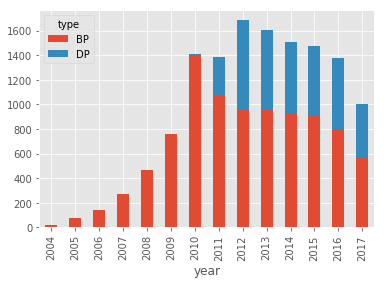

In [111]:

obhajene = df.loc[df['success'] == 1]

obhajene.groupby(['year','type'])['title_cz'].size().unstack().plot(kind='bar',stacked=True)


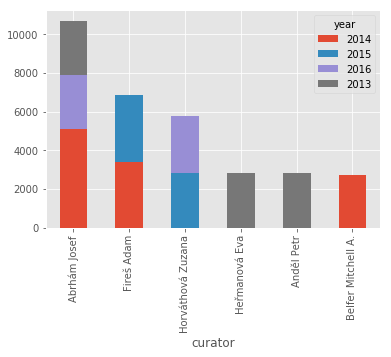

In [16]:
# ZADANI 2 (Z2): Nejpilnější vedoucí (počet vedených prací na rok, za celou dobu atp.). 

# RESENI Z2 verze 1. : 10 nejvetsich "ctenarskych" uspechu nejpracovitejsich vedoucich
# muzeme videt kolik stranek bakalarek precetli za svou karieru a v kterem roce nejvice cetli

# POZNAMKA : kdybyste radeji pocty praci nez pocet stranek, staci misto .sum() dat .count()
# takhle mi to ale prislo vic cool, ze je videt ze cetli treba 5000 stranek...
df.groupby(['curator','year'])['cntpages'].sum().sort_values(ascending=False).head(10).unstack().plot(kind='bar',stacked=True)

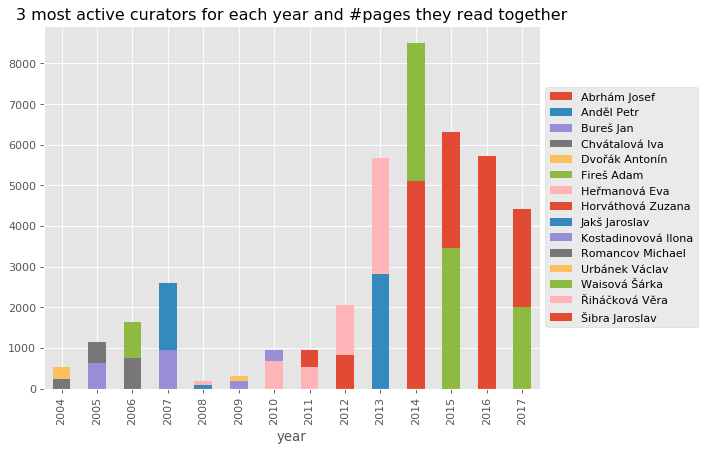

In [126]:
# RESENI Z2 verze 2. : Pro kazdy rok 3 nejpilnejsi vedouci, kolik precetl stranek kazdy z nich a kolik vsichni dohromady 
# tady je to jednoduse ro po roku, pro kazdy rok mame 3 nejpilnejsi ctenare


# seskupime podle roku a vedouciho, secteme pocty jejich stranek
df_agg = df.groupby(['year','curator']).agg({'cntpages':sum})

# seradime v ramci techto skupin a vybereme vzdy 3 nejvetsi hodnoty
g = df_agg['cntpages'].groupby(level=0, group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(2))

# unstackneme kvuli vykresleni do grafu
d= res.unstack()

# hack aby gra byl vetsi ( pro lepsi citelnost)
from matplotlib.pyplot import figure
f = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# plotneme to
plt.title('3 most active curators for each year and #pages they read together', color='black')
d.plot(kind='bar', stacked=True, ax=f.gca())

# odsuneme legendu kousek stranou, at nam nezaclani do grafu
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

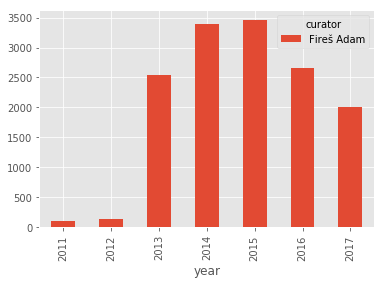

In [167]:
# RESENI Z2 verze 3. :
# Tady jednoduse ten (jeden) nejpilnejsi vedouci a kolik praci udelal v jednotlivych letech
# RESENI 
df.groupby("curator").agg({"cntpages" : sum}).sort_values("cntpages", ascending=False).head().iloc[1]
df.loc[df['curator'] == "Fireš Adam"].groupby(['year','curator'])['cntpages'].sum().sort_values(ascending=False).head(10).unstack().plot(kind='bar',stacked=True)


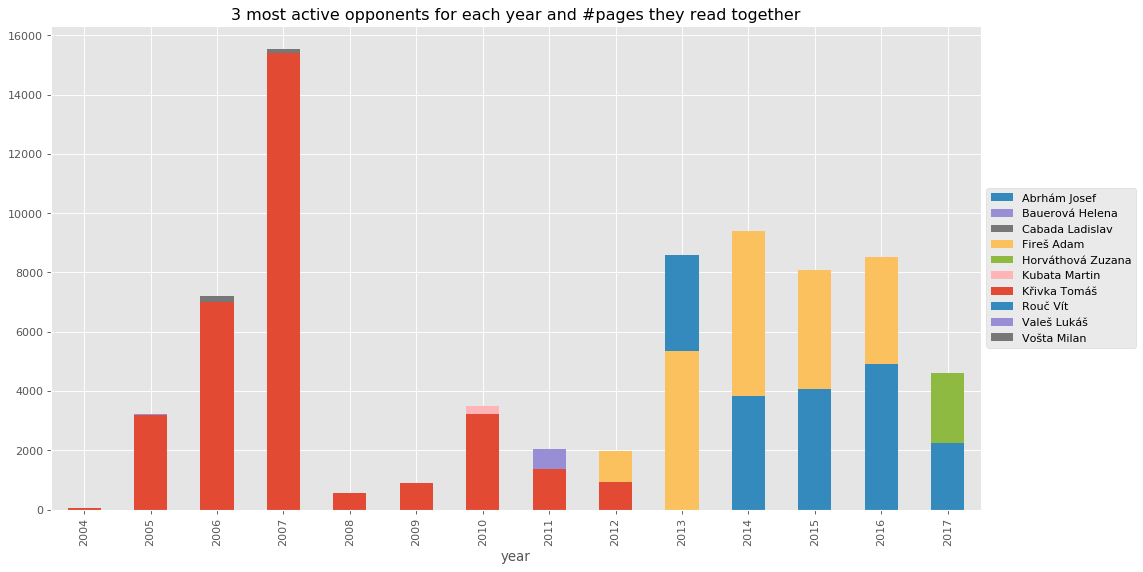

In [154]:
# ZADANI 3 (Z3) To samé pro oponenty a pro součet vedených a oponovaných prací.

# RESENI Z3 verze 1: to same jako Z2 ( pouzil jsem Z2 verze 2. , protoze mi prisla nejzajimavejsi a nejslozitejsi)


# seskupime podle roku a oponenta, secteme pocty jejich stranek
df_agg = df.groupby(['year','opponent']).agg({'cntpages':sum})

# seradime v ramci techto skupin a vybereme vzdy 3 nejvetsi hodnoty
g = df_agg['cntpages'].groupby(level=0, group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(2))

# unstackneme kvuli vykresleni do grafu
d= res.unstack()

# hack aby gra byl vetsi ( pro lepsi citelnost)
from matplotlib.pyplot import figure
f = plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

# plotneme to
plt.title('3 most active opponents for each year and #pages they read together', color='black')
d.plot(kind='bar', stacked=True, ax=f.gca())

# odsuneme legendu kousek stranou, at nam nezaclani do grafu
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

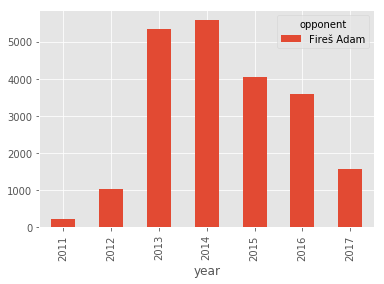

In [169]:
# RESENI Z3 verze 2: verze ktera podle me nejlepe koreluje s tim jak bylo mysleno zadani
df.groupby("opponent").agg({"cntpages" : sum}).sort_values('cntpages', ascending=False).head()
df.loc[df['opponent'] == "Fireš Adam"].groupby(['year','opponent'])['cntpages'].sum().sort_values(ascending=False).head(10).unstack().plot(kind='bar',stacked=True)

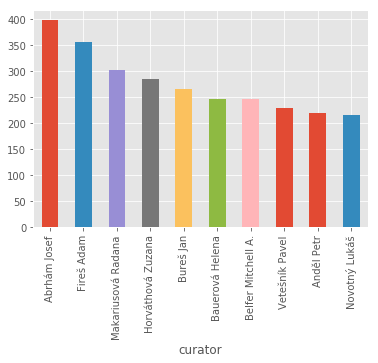

In [186]:
# Reseni Z3 verze 3: tentorat vedouci a oponent zaroven

# seskupime podle roku a oponenta, secteme pocty jejich praci
pocty_praci_oponentu = df.groupby(['opponent']).count()
pocty_praci_oponentu = df.groupby(['curator']).count()

# dohromady pocty praci
pocty_praci_dohromady = pocty_praci_oponentu + pocty_praci_oponentu

# bereme 10 nejaktivnejsich
pocty_praci_dohromady.sort_values('title_cz', ascending=False).head(10)['title_cz'].plot(kind='bar')



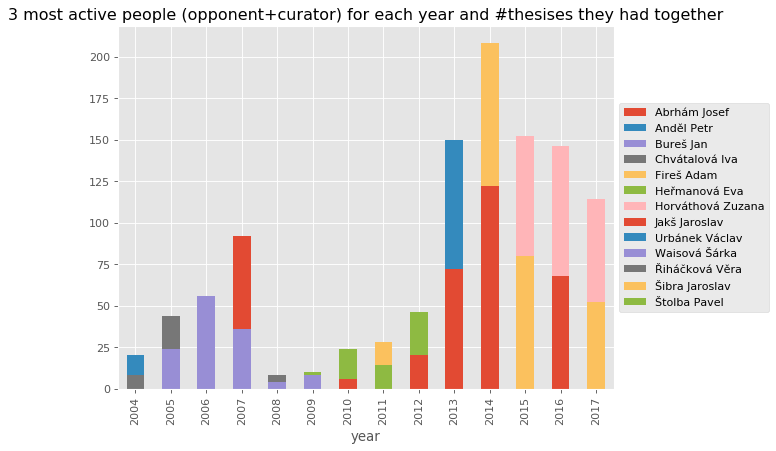

In [190]:
# Reseni Z3 verze 4: tentorat vedouci a oponent zaroven, navic podle roku



# seskupime podle roku a vedouciho, secteme pocty praci
df_agg_curators = df.groupby(['year','curator']).count()

df_agg_opponents = df.groupby(['year','curator']).count()

df_agg = df_agg_curators + df_agg_opponents
# seradime v ramci techto skupin a vybereme vzdy 3 nejvetsi hodnoty
g = df_agg['cntpages'].groupby(level=0, group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(2))


# unstackneme kvuli vykresleni do grafu
d= res.unstack()

# hack aby gra byl vetsi ( pro lepsi citelnost)
from matplotlib.pyplot import figure
f = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# plotneme to
plt.title('3 most active people (opponent+curator) for each year and #thesises they had together', color='black')
d.plot(kind='bar', stacked=True, ax=f.gca())

# odsuneme legendu kousek stranou, at nam nezaclani do grafu
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

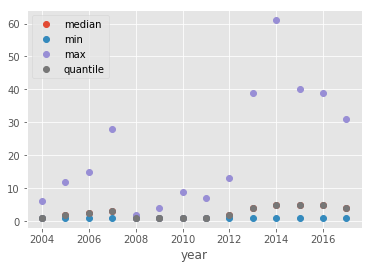

In [233]:
# ZADANI Z4: Průměrný počet (medián, minimum, maximum, rozptyl) 
# prací na vedoucího (resp. oponenta) a rok
# RESENI Z4: pro vedouci prace
df_agg = df.groupby(['year','curator']).count()
g = df_agg['title_cz'].groupby(level=0, group_keys=False)
g.agg(['median','min', 'max', 'quantile']).plot(style='o')

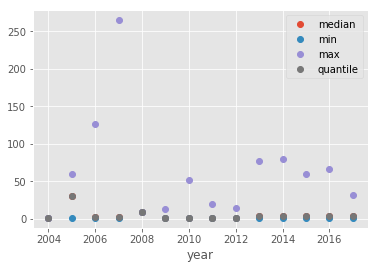

In [234]:
# RESENI Z4: pro oponenty
df_agg = df.groupby(['year','opponent']).count()
g = df_agg['title_cz'].groupby(level=0, group_keys=False)
g.agg(['median','min', 'max', 'quantile']).plot(style='o')

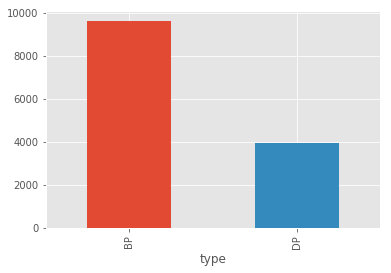

In [245]:
# ZADANI Z5: Rozložení vedoucích prací (a oponentů) podle titulů (bakalářský titul, magisterský titul, doktorský titul, docent, profesor, atp.).

# RESENI Z5: nemam na to data; v zadani jsem se nedocetl ze mam vytezit i tituly vedoucich / oponentu :-(
# ale reseni by bylo takto:
#df.groupby("titul_vedouciho")['title_cz'].count().plot(kind='bar')
#df.groupby("titul_oponenta")['title_cz'].count().plot(kind='bar')

In [34]:
# (až +2 body) 
#Zobrazte tabulku (a případně i jiné věci) 
#v Jupyter notebooku pomocí http://beakerx.com

# conda ani pip mi nechteli nainstalovat beakerx :-(
# jest
from beakerx import *

TableDisplay(df)


Text(0.5,1,'Diplomove')

Text(0.5,1,'Bakalarske')

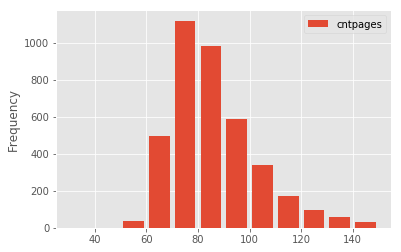

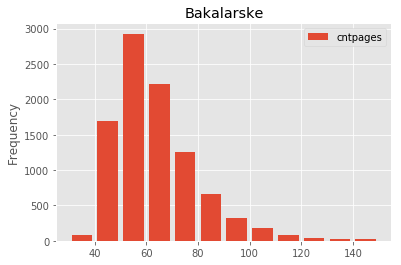

In [49]:
# (až +2 body) Vymyslete další zajímavé pohledy na data.



# 1. POCTY BAKALARSKYCH A DIPLOMOVYCH PRACI PODLE SKUPIN DELKY POCTU STRANEK
from IPython.display import display

# nejcastejti delky bakalarskych a diplomovych praci
#df[['cntpages']].plot(kind='hist',bins=[20,40,60,80,100,120,140,160,180,200],rwidth=0.8)

diplomove = df.loc[df['type'] == 'DP'][['cntpages']].plot(kind='hist',bins=[30, 40,50,60,70,80,90,100,110,120,130, 140, 150],rwidth=0.8)

bakalarske = df.loc[df['type'] == 'BP'][['cntpages']].plot(kind='hist',bins=[30, 40,50,60,70,80,90,100,110,120,130, 140, 150],rwidth=0.8)

display(plt.title('Diplomove', color='black'))
display(bakalarske)
display(plt.title('Bakalarske', color='black'))
display(diplomove)

In [ ]:
# (až +4 body) Vytvořte na základě Vašich dat interaktivní webovou stránku s popisem a
# vizualizací dat (bude asi nutné použít i nějaké javascriptové balíčky atp.).

In [ ]:
# (až +4 body) Stáhněte data k více školám a porovnejte výsledky. Zkuste najít společné školitele/oponenty.
# TODO


# >>> Mam to v planu udelat behem vikendu, ale jeste jsem se k tomu nedostal <<< 